Q1) What is Gradient Boosting Regression?

In [ ]:
Gradient Boosting Regression is a type of machine learning algorithm that is used for regression problems. It is a powerful 
technique that combines multiple weak regression models into a single, strong model. The basic idea behind gradient boosting 
regression is to iteratively add new models to the ensemble that correct the errors made by the previous models.

In gradient boosting, each model in the ensemble is built by optimizing a cost function that measures the difference between 
the predicted values and the true values of the target variable. The optimization is performed using gradient descent, which 
involves iteratively adjusting the model parameters in the direction of steepest descent of the cost function.

Gradient boosting regression is a popular technique for solving a variety of regression problems, such as predicting house
prices, stock prices, and customer lifetime value. It is known for its ability to handle complex, non-linear relationships
between the input features and the target variable, and for its high accuracy and robustness. However, it can be 
computationally expensive and may require careful tuning of hyperparameters to achieve optimal performance.

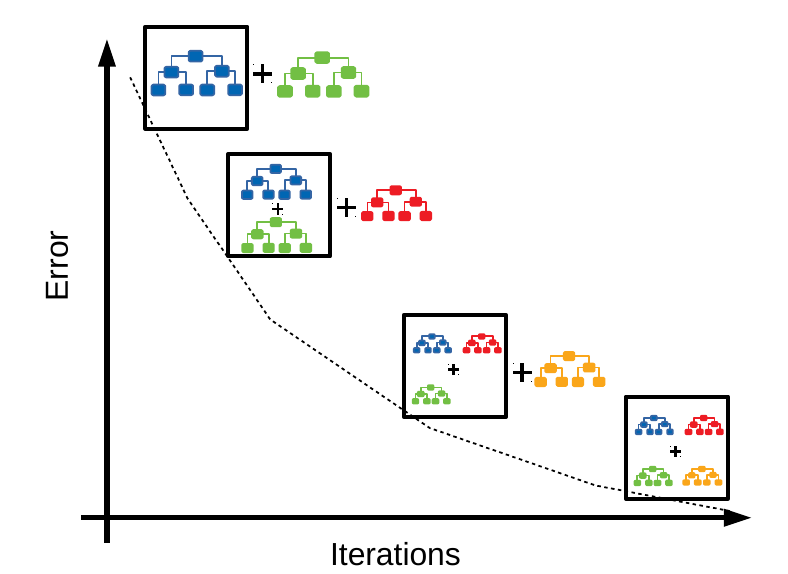

Q2) Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

In [1]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000,n_features=1,n_informative=1, noise=20,random_state=43)

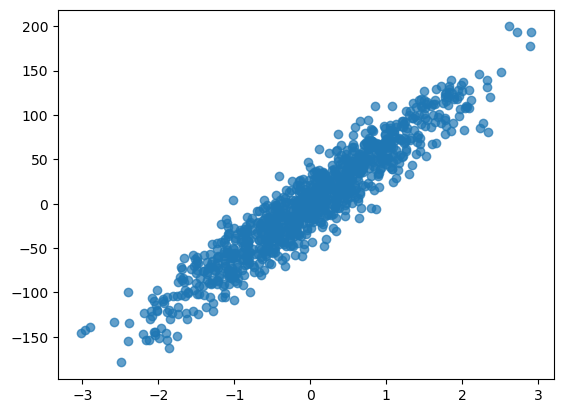

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,alpha=0.7)

In [3]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [4]:
xtrain.shape

(800, 1)

In [5]:
xtest.shape

(200, 1)

In [6]:
# Define number of trees and learning rate
n_estimators = 1000
learning_rate = 0.001

In [7]:
# Initialize ensemble predictions to the mean of the target variable
import numpy as np
ensemble_preds = np.full_like(ytrain, np.mean(ytrain))

In [8]:
# Train the model using gradient boosting
from sklearn.tree import DecisionTreeRegressor
stubs = []
for i in range(n_estimators):
    # Compute the residual between the current predictions and the true target values
    residuals = ytrain - ensemble_preds
    
    # Fit a regression tree to the residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(xtrain, residuals)

    stubs.append(tree)
    
    # Update the ensemble predictions with the current tree's predictions
    ensemble_preds += learning_rate * tree.predict(xtrain)

In [9]:
# Evaluate the model on the test set
y_pred = np.full_like(ytest, np.mean(ytrain))
for i in range(n_estimators):
    y_pred += learning_rate * stubs[i].predict(xtest)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [11]:
print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 822.8074571899081
R-squared: 0.7836513313762161


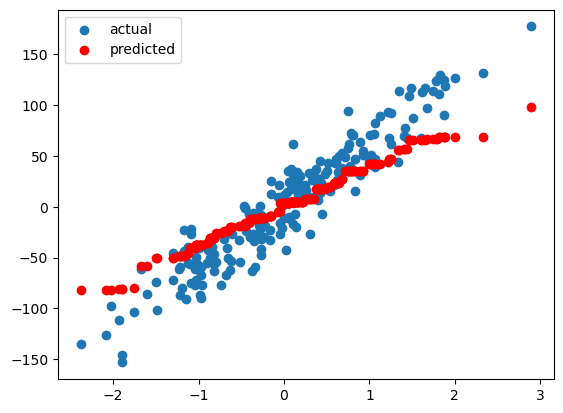

In [12]:
plt.scatter(xtest,ytest,label='actual')
plt.scatter(xtest, y_pred,c='r',label='predicted')
plt.legend()
plt.show()

Q3) What is a weak learner in Gradient Boosting?

In [ ]:
A weak learner in gradient boosting is a model that performs slightly better than random guessing. In the context of
gradient boosting, a weak learner is typically a decision tree with a small number of leaf nodes (also called a "shallow"
decision tree), since it can only make simple splits in the data.

The idea behind gradient boosting is to iteratively add weak learners to the ensemble, where each new learner tries to
improve the performance of the previous learners. In each iteration, the gradient boosting algorithm fits a new weak 
learner to the negative gradient of the loss function with respect to the current predictions of the ensemble. This allows
the algorithm to "correct" the errors made by the previous learners and gradually improve the overall performance of the
ensemble.

Since the weak learners are simple and have low variance, they are less prone to overfitting than more complex models. 
This allows gradient boosting to achieve good performance on a variety of regression and classification problems, even 
when the number of features is large and the relationships between features and target variable are complex. However, it
also means that gradient boosting may require a large number of weak learners to achieve good performance, which can 
increase the training time and memory usage of the algorithm.

Q4) What is the intuition behind the Gradient Boosting algorithm?

In [ ]:
The Gradient Boosting algorithm is an ensemble learning technique that combines multiple weak models to create a more 
accurate and robust prediction model. The intuition behind this algorithm can be summarized as follows:
    
1.Start with an initial model that makes a prediction based on a set of input features.

2.Compute the difference between the predicted value and the actual value (also known as the "residual").

3.Fit a new model to the residual, aiming to reduce its variance (e.g., by fitting a decision tree with a small number of 
leaf nodes).

4.Add the new model to the ensemble by combining it with the previous models in a weighted manner (e.g., by taking a 
weighted average of their predictions).

5.Repeat steps 2-4 multiple times, using the residual of the previous iteration as the target variable for the new model.

6.Stop when the desired level of accuracy is reached, or when the model begins to overfit the training data.

The intuition behind this approach is that by iteratively adding new models to the ensemble and focusing on the errors of
the previous models, the Gradient Boosting algorithm can gradually improve the accuracy of the final model. This is 
achieved by learning from the mistakes of the previous models and correcting them in the subsequent models.

Moreover, the algorithm also avoids overfitting by using weak models with low variance and high bias, which are less
likely to memorize the training data and can generalize well to unseen data. The combination of these weak models in the
ensemble results in a strong model with low bias and low variance, which can provide accurate predictions for a wide range
of problems.

In summary, the Gradient Boosting algorithm provides a powerful and flexible framework for building accurate prediction
models that can generalize well to new data.

Q5) How does Gradient Boosting algorithm build an ensemble of weak learners?

In [ ]:
The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential and iterative manner. At each
iteration, the algorithm trains a new weak learner that can improve the accuracy of the current ensemble, and then adds 
it to the ensemble in a weighted manner.

The general steps of the Gradient Boosting algorithm are:
    
1.Initialize the ensemble by fitting a single weak learner (e.g., a decision tree) to the data and making a prediction
based on the input features.

2.Compute the difference between the predicted values and the true target values, which is called the residual.

3.Train a new weak learner to predict the residual (i.e., the difference between the predicted and true values) instead 
of the original target variable. This new learner is fit to the negative gradient of the loss function with respect to the
current predictions of the ensemble, which gives it a clear direction for improving the predictions.

4.Add the new weak learner to the ensemble by combining it with the previous learners in a weighted manner. The weights 
of the previous learners are adjusted to give more weight to the models that made larger contributions to the prediction.

5.Repeat steps 2-4 until a stopping criterion is met (e.g., a maximum number of iterations, a minimum improvement in
accuracy, or the presence of overfitting).

By iteratively adding new weak learners to the ensemble and adjusting the weights of the previous learners, the Gradient
Boosting algorithm can create a highly accurate and robust prediction model. The ensemble of weak learners can capture
complex nonlinear relationships between the input features and the target variable, while the iterative learning process 
can gradually refine the predictions and reduce the residual error.

Overall, the Gradient Boosting algorithm is an effective way to build an ensemble of weak learners and create a strong
prediction model that can generalize well to new data.

Q6) What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

In [ ]:
Gradient Boosting is a popular machine learning algorithm used for both regression and classification tasks. Here are the
steps involved in constructing the mathematical intuition of Gradient Boosting:
    
1.Define the problem: Define the problem you want to solve using Gradient Boosting, whether it's a regression or
classification task.

2.Define the loss function: The loss function is a measure of how well the algorithm is doing in fitting the training data.
In Gradient Boosting, we typically use a differentiable loss function such as mean squared error for regression or log
loss for classification.

3.Create an initial model: Create an initial model to make predictions. This model can be as simple as the mean of the
target variable or a linear regression model.

4.Calculate the residual errors: Calculate the residual errors by subtracting the predictions of the initial model from 
the actual values of the target variable.

5.Train a new model on the residual errors: Train a new model on the residual errors from the previous step. This model 
is usually a decision tree with a fixed depth.

6.Add the predictions of the new model to the previous predictions: Add the predictions of the new model to the previous
predictions to update the model. This process is called boosting because we are boosting the performance of the model by
adding new models to it.

7.Repeat steps 4 to 6 until convergence: Repeat steps 4 to 6 until the model converges or until a stopping criterion is
met. The stopping criterion can be a maximum number of models, a threshold for the improvement of the loss function, or a 
maximum depth for the decision trees.

8.Make predictions: Use the final model to make predictions on new data.

Overall, Gradient Boosting works by iteratively improving the model by adding new models to correct the errors of the
previous models. This process continues until the model converges or a stopping criterion is met.